# Project :  Holiday weather


There is nothing I like better than taking a holiday. In this project I am going to use the historic weather data from the Weather Underground for London to try to predict two good weather weeks to take off as holiday. Of course the weather in the summer of 2016 may be very different to 2014 but it should give some indication of when would be a good time to take a summer break.

## Getting the data

Weather Underground keeps historical weather data collected in many airports around the world. Right-click on the following URL and choose 'Open Link in New Window' (or similar, depending on your browser):

http://www.wunderground.com/history

When the new page opens start typing 'LHR' in the 'Location' input box and when the pop up menu comes up with the option 'LHR, United Kingdom' select it and then click on 'Submit'. 

When the next page opens with London Heathrow data, click on the 'Custom' tab and select the time period From: 1 January 2014 to: 31 December 2014 and then click on 'Get History'. The data for that year should then be displayed further down the page. 

You can copy each month's data directly from the browser to a text editor like Notepad or TextEdit, to obtain a single file with as many months as you wish.

Weather Underground has changed in the past the way it provides data and may do so again in the future. 
I have therefore collated the whole 2014 data in the provided 'London_2014.csv' file which can be found in the project folder. 

Now load the CSV file into a dataframe making sure that any extra spaces are skipped:

In [15]:
import warnings
warnings.simplefilter('ignore', FutureWarning)


import pandas as pd
from datetime import datetime

Beijing = pd.read_csv('Beijing_PEK_2014.csv', skipinitialspace=True)

## Cleaning the data
First we need to clean up the data. I'm not going to make use of `'WindDirDegrees'` in my analysis, but you might in yours so we'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

In [16]:
Beijing.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,12,4,-2,-12,-17,-20,44,19,7,...,31,11,5,32,16,47.0,0.0,NaN,NaN,291<br />
1,2014-1-2,7,0,-6,-6,-9,-13,74,50,28,...,18,7,3,18,5,NaN,0.0,NaN,NaN,20<br />
2,2014-1-3,9,3,-2,-7,-13,-18,64,32,9,...,31,13,5,18,8,NaN,0.0,NaN,NaN,24<br />
3,2014-1-4,2,-2,-6,-4,-7,-9,80,68,44,...,10,5,2,11,5,NaN,0.0,2.0,NaN,56<br />
4,2014-1-5,7,0,-7,-5,-11,-15,80,51,15,...,31,7,3,18,10,NaN,0.0,NaN,NaN,18<br />


remove the  `< br />`  html line breaks from the values in the `'WindDirDegrees'` column. 

In [18]:
Beijing = Beijing.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})


and change the values in the `'WindDirDegrees'` column to `float64`:

In [19]:
Beijing['WindDirDegrees'] = Beijing['WindDirDegrees'].str.rstrip('<br />')

We definitely need to change the values in the `'GMT'` column into values of the `datetime64`  date type.

In [20]:
Beijing['WindDirDegrees'] = Beijing['WindDirDegrees'].astype('float64')

In [40]:
#The Date column also has a datatype of objects ie strings instead of date.
#To fix that I'll convert it to a date and also use it as the index

Beijing['Date'] = pd.to_datetime(Beijing['Date'], format='%Y-%m-%d')

In [51]:
Beijing['Date']= pd.to_datetime(Beijing['Date'])

In [52]:
Beijing.index = Beijing['Date']

Lets Plot the Temperatures.

In [53]:
%matplotlib inline


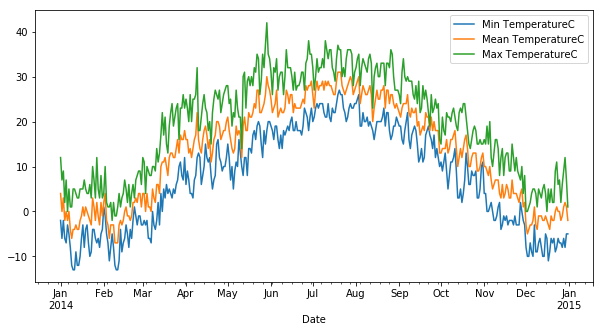

In [54]:
Beijing[['Min TemperatureC', 'Mean TemperatureC','Max TemperatureC']].plot(grid=False, figsize =(10,5))

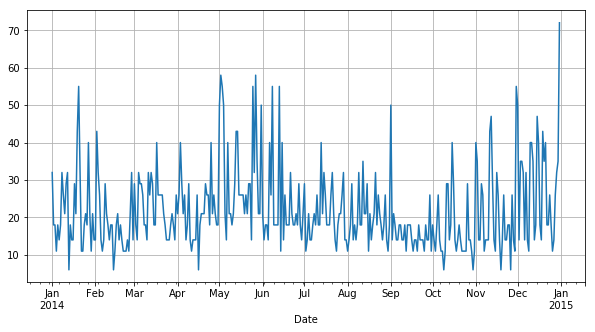

In [55]:
Beijing['Max Wind SpeedKm/h'].plot(grid=True, figsize=(10,5))

Well looking at the graph the second half of July looks good for mean temperatures over 20 degrees C so let's also put precipitation on the graph too:

In [56]:
summer = Beijing.loc[datetime(2014,6,1): datetime(2014,8,31)]

In [57]:
summer[summer['Mean TemperatureC']>= 25]
summer.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-06-01,2014-06-01,31,25,19,18,16,12,88,64,25,...,21,10,6,21,13,35.0,2.03,4.0,Rain-Thunderstorm,16.0
2014-06-02,2014-06-02,26,22,18,15,13,11,73,53,29,...,31,24,10,14,6,NaN,0.00,8.0,NaN,355.0
2014-06-03,2014-06-03,32,23,16,14,13,11,82,47,19,...,26,18,6,18,10,NaN,0.00,NaN,NaN,85.0
2014-06-04,2014-06-04,31,24,19,17,14,13,83,50,26,...,18,9,6,18,6,NaN,0.00,8.0,NaN,205.0
2014-06-05,2014-06-05,34,27,19,17,15,13,83,47,19,...,23,9,6,14,8,NaN,0.00,NaN,NaN,172.0
